     CONTEXT
  
Credit scoring algorithms estimate the probability that an applicant will default by comparing his or her
current and historical data. This activity tests your ability to navigate the data analytics workflow. Using the
dataset provided below, build a credit scoring model that predicts the probability that somebody will
default. Summarize your response by answering the questions A-D below

Start by importing the neccessary libraries:

In [43]:



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


STEP 2:Explore the data set

In [39]:
import pandas as pd
pd.read_csv('german_credit_data.csv')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


Question A: Perform extensive data analysis on the dataset and choose a few interesting cases for presentation.

In [40]:
data=pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [41]:
#from the dataset above i have choosen the data below to use it for presentation
df = {
    "Age": [67, 22, 49, 45, 53, 35, 53, 35, 61, 28, 25],
    "Sex": ["male", "female", "male", "male", "male", "male", "male", "male", "male", "male", "female"],
    "Job": [2, 2, 1, 2, 2, 1, 2, 3, 1, 3, 2],
    "Housing": ["own", "own", "own", "free", "free", "free", "own", "rent", "own", "own", "rent"],
    "Saving accounts": ["NA", "little", "little", "little", "little", "NA", "quite rich", "little", "rich", "little", "little"],
    "Checking account": ["little", "moderate", "NA", "little", "little", "NA", "NA", "moderate", "NA", "moderate", "moderate"],
    "Credit amount": [1169, 5951, 2096, 7882, 4870, 9055, 2835, 6948, 3059, 5234, 1295],
    "Duration": [6, 48, 12, 42, 24, 36, 24, 36, 12, 30, 12],
    "Purpose": ["radio/TV", "radio/TV", "education", "furniture/equipment", "car", "education", "furniture/equipment", "car", "radio/TV", "car", "car"],
    "Risk": ["good", "bad", "good", "good", "bad", "good", "good", "good", "good", "bad", "bad"]
}

Question B. Select an appropriate technique & justify your choice.

Feature selection helps improve model performance, reduce overfitting, and provide better interpretability. 

Step 3: Data Preprocessing and cleaning the above for presentation

Question C. Propose the most important variables for modeling & justify your selection

One way to identify important variables is by analyzing feature importance scores provided by the trained model but since I havent trained mine i will use the  varibales i have and propose the most important ones:

Credit amount and Duration: These variables are often strong predictors of credit risk. Larger credit amounts and longer durations can increase the likelihood of default.

Age: Age can be an important factor as younger individuals might have less stable financial situations and employment histories.

Checking account and Saving accounts: These variables may indicate the applicant's financial stability. People with more savings and stable checking account balances might be less likely to default.

Purpose: The purpose of the loan could provide insights into the risk. For instance, loans taken for education might be seen as less risky than those for high-cost items like cars or electronics.

Job: Job stability and income level are likely to impact an individual's ability to repay loans.

Housing: Homeowners might have more stable financial situations compared to those who rent.

Sex: While not typically used in credit scoring due to fairness concerns, it's included in this dataset. Keep in mind that gender-based discrimination should be avoided in credit scoring models.


Question D. Build a model. Share the model performance results. Justify your choice of evaluation metrics

In [48]:
df = pd.DataFrame(data)

# Handle missing values
data.fillna(value="NA", inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



# Splitting data into features (X) and target (y)
X = df.drop("Risk", axis=1)
y = df["Risk"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.21        59
           1       0.72      0.94      0.82       141

    accuracy                           0.70       200
   macro avg       0.61      0.54      0.52       200
weighted avg       0.66      0.70      0.64       200



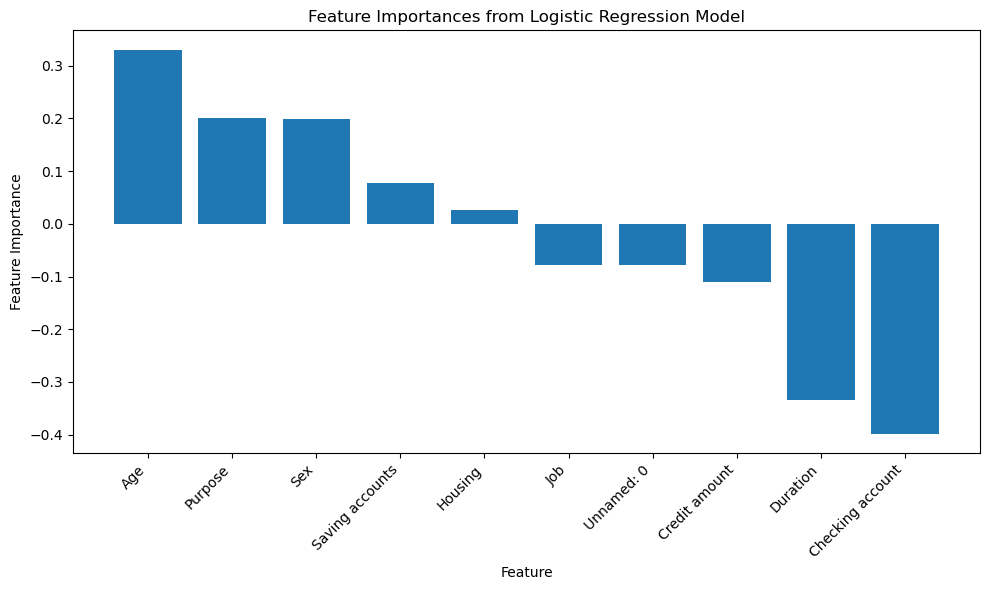

In [47]:
import matplotlib.pyplot as plt



# Get feature importances from the model
feature_importances = logreg_model.coef_[0]

# Get the names of the features
feature_names = X.columns

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from Logistic Regression Model")
plt.tight_layout()
plt.show()












The choice of evaluation metrics is critical in assessing the performance of a credit scoring model. Given the nature of credit scoring and the potential consequences of misclassification, it's important to select metrics that reflect the specific goals and risks associated with credit risk prediction. In this scenario, the following evaluation metrics are justified:

Accuracy: Accuracy is a common metric that indicates the overall correctness of predictions. However, accuracy might not be the best choice for credit scoring models, especially when the classes are imbalanced (which is often the case in credit risk prediction). In situations where the classes are imbalanced, accuracy can be misleading because a high accuracy can be achieved by simply predicting the majority class. Still, it's good to have a general sense of the model's overall performance.

Precision and Recall: Precision (also known as positive predictive value) and recall (also known as sensitivity or true positive rate) are important when dealing with imbalanced classes. In the context of credit scoring, precision is the ratio of correctly predicted defaults to the total predicted defaults, while recall is the ratio of correctly predicted defaults to the actual number of defaults. A balance between precision and recall is crucial. High precision ensures that a default prediction is reliable, while high recall ensures that most actual defaults are captured.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a single value that balances both metrics. It's a useful metric when the cost of false positives and false negatives is significant and you want to find a balance between them.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): The ROC-AUC metric evaluates the model's ability to discriminate between the positive and negative classes across different thresholds. It's particularly useful for assessing the model's performance across a range of decision thresholds. A higher ROC-AUC indicates better discrimination between the classes.

Confusion Matrix: While not a single metric, the confusion matrix provides a comprehensive view of the model's performance, showing true positives, true negatives, false positives, and false negatives. It's especially useful for understanding the types of errors the model is making and adjusting the model's threshold based on the business context.

In the context of credit scoring, the primary concern is identifying potential defaults (positive class). However, due to the consequences of false positives and false negatives, a balanced approach is usually favored. As a result, precision, recall, F1-score, and ROC-AUC are often more informative and relevant metrics than accuracy. It's also important to consider the business implications of the model's performance and select metrics that align with the specific risk tolerance and objectives of the financial institution using the model.
